In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Задача 1**

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [2]:
ds = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [3]:
df = pd.DataFrame(ds, columns=['salary'])

среднее арифметическоe:

In [4]:
mean_salary = df['salary'].sum() / df['salary'].count()
print(mean_salary)

65.3


In [5]:
mean_salary_2 = df['salary'].mean()
print(mean_salary_2)

65.3


среднее квадратичное отклонение:

In [6]:
average_salary = np.sqrt(((df['salary'] - df['salary'].mean())**2).sum() / df['salary'].count())
print(average_salary)

30.823854398825596


In [7]:
average_salary_2 = df['salary'].std(ddof=0)
print(average_salary_2)

30.823854398825596


смещенная оценка дисперсии:

In [8]:
variance_salary = ((df['salary'] - df['salary'].mean()) ** 2).sum() / df['salary'].count()
variance_salary

950.11

In [9]:
variance_salary_2 = df['salary'].var(ddof=0)
variance_salary_2

950.11

не смещенная оценка дисперсии:

In [10]:
not_variance_salary = ((df['salary'] - df['salary'].mean()) ** 2).sum() / (df['salary'].count() - 1)
not_variance_salary

1000.1157894736842

In [11]:
not_variance_salary_2 = df['salary'].var(ddof=1)
not_variance_salary_2

1000.1157894736842

**Задача 2**

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [12]:
first_quartile = df['salary'].quantile(0.25)
first_quartile

42.0

In [13]:
third_quartile = df['salary'].quantile(0.75)
third_quartile

81.0

In [14]:
sweep = third_quartile - first_quartile
sweep

39.0

<AxesSubplot:>

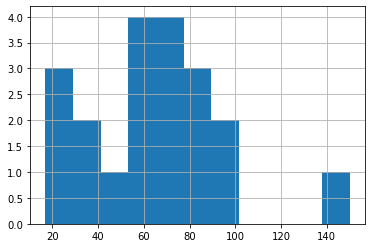

In [15]:
df['salary'].hist(bins=11)

<AxesSubplot:>

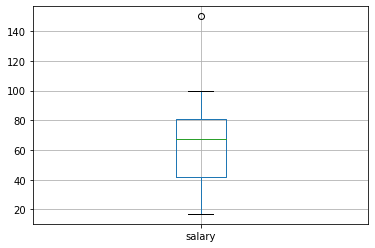

In [16]:
df[['salary']].boxplot()

Выбросом является значение = 150, это подтверждает и гистограмма и boxplot

In [17]:
boxplot_range = (first_quartile - 1.5 * sweep, third_quartile + 1.5 * sweep)
boxplot_range

(-16.5, 139.5)

In [20]:
outliers = df.loc[(df['salary'] < boxplot_range[0]) | (df['salary'] > boxplot_range[1])]
outliers.shape[0]

1

In [21]:
outliers.shape[0] / df.shape[0]

0.05

**Задача 3**

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

*Вероятность, что наш студент с факультета А или В равна по 1/4, а вероятность что студент с факультета С равна 2/4.*

Событием $A$ будем считать сдачу первой сессии, а событиями $B_1$ - что студент учится на факультете А, $B_2$ - студент учится на факультете В и $B_3$ — студент учится на факультете С:

$$P(A\:|\:B_1) = 0.8$$

$$P(A\:|\:B_2) = 0.7$$

$$P(A\:|\:B_3) = 0.9$$

Вероятность того, что студент учится на факультете А найдем по формуле:

$$P(B_1\:|\:A) = \frac{P(B_1) \cdot P(A\:|\:B_1)}{P(A)}$$

$$P(B_1\:|\:A) = \frac{\frac{1}{4} \cdot 0.8}{\frac{1}{4} \cdot 0.8 + \frac{1}{4} \cdot 0.7 + \frac{2}{4} \cdot 0.9} = \frac{\frac{2}{10}}{\frac{825}{1000}} = \frac{200}{825} \approx 0.24$$

Вероятность того, что студент учится на факультете В:

$$P(B_2\:|\:A) = \frac{\frac{1}{4} \cdot 0.7}{\frac{1}{4} \cdot 0.8 + \frac{1}{4} \cdot 0.7 + \frac{2}{4} \cdot 0.9} = \frac{\frac{175}{1000}}{\frac{825}{1000}} = \frac{175}{825} = \frac{7}{33} \approx 0.21$$

Вероятность того, что студент учится на факультете С равна:

$$P(B_3\:|\:A) = \frac{\frac{2}{4} \cdot 0.9}{\frac{1}{4} \cdot 0.8 + \frac{1}{4} \cdot 0.7 + \frac{2}{4} \cdot 0.9} = \frac{\frac{45}{100}}{\frac{825}{1000}} = \frac{450}{825} = \frac{18}{33} \approx 0,55$$

Можно заметить, что общая вероятность равна 1

**Ответ:** вероятность, что студент учится: \
a) на факультете A равна 0,24 \
б) на факультете B равна 0,21 \
в) на факультете C равна 0,55